<a href="https://colab.research.google.com/github/srinivasiyengar/NewCastle-University-Internship/blob/main/Image_Enhancing_using_ESRGAN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import time
from PIL import Image
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
os.environ["TFHUB_DOWNLOAD_PROGRESS"] = "True"
import cv2

In [ ]:
SAVED_MODEL_PATH = "https://tfhub.dev/captain-pool/esrgan-tf2/1"

In [ ]:
def preprocess_image(hr_image):
  """ Loads image from path and preprocesses to make it model ready
      Args:
        image_path: Path to the image file
  """
  # If PNG, remove the alpha channel. The model only supports
  # images with 3 color channels.
  if hr_image.shape[-1] == 4:
    hr_image = hr_image[...,:-1]
  hr_size = (tf.convert_to_tensor(hr_image.shape[:-1]) // 4) * 4
  hr_image = tf.image.crop_to_bounding_box(hr_image, 0, 0, hr_size[0], hr_size[1])
  hr_image = tf.cast(hr_image, tf.float32)
  return tf.expand_dims(hr_image, 0)

In [ ]:
def save_image(image, filename):
  """
    Saves unscaled Tensor Images.
    Args:
      image: 3D image tensor. [height, width, channels]
      filename: Name of the file to save to.
  """
  if not isinstance(image, Image.Image):
    image = tf.clip_by_value(image, 0, 255)
    image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
  image.save("%s.jpg" % filename)
  print("Saved as %s.jpg" % filename)

In [ ]:
%matplotlib inline
def plot_image(image, title=""):
  """
    Plots images from image tensors.
    Args:
      image: 3D image tensor. [height, width, channels].
      title: Title to display in the plot.
  """
  image = np.asarray(image) 
  image = tf.clip_by_value(image, 0, 255)
  image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
  plt.imshow(image)
  plt.axis("off")
  plt.title(title)

In [ ]:
def downscale_image(image):
  """
      Scales down images using bicubic downsampling.
      Args:
          image: 3D or 4D tensor of preprocessed image
  """
  image_size = []
  if len(image.shape) == 3:
    image_size = [image.shape[1], image.shape[0]]
  else:
    raise ValueError("Dimension mismatch. Can work only on single image.")

  image = tf.squeeze(
      tf.cast(
          tf.clip_by_value(image, 0, 255), tf.uint8))

  lr_image = np.asarray(
    Image.fromarray(image.numpy())
    .resize([image_size[0] // 4, image_size[1] // 4],
              Image.BICUBIC))

  lr_image = tf.expand_dims(lr_image, 0)
  lr_image = tf.cast(lr_image, tf.float32)
  return lr_image

In [ ]:
def super_resolution(hr_image):
  start = time.time()
  fake_image = model(hr_image)
  fake_image = tf.squeeze(fake_image)
  return fake_image

In [ ]:
image_set = []

In [ ]:
img = cv2.imread('/5.jpg')
image_set.append(img)

In [ ]:
model = hub.load(SAVED_MODEL_PATH)

In [ ]:
hr_image = preprocess_image(image_set[4])

In [ ]:
fake_image = super_resolution(hr_image) 

In [ ]:
lr_image = downscale_image(tf.squeeze(hr_image)) 

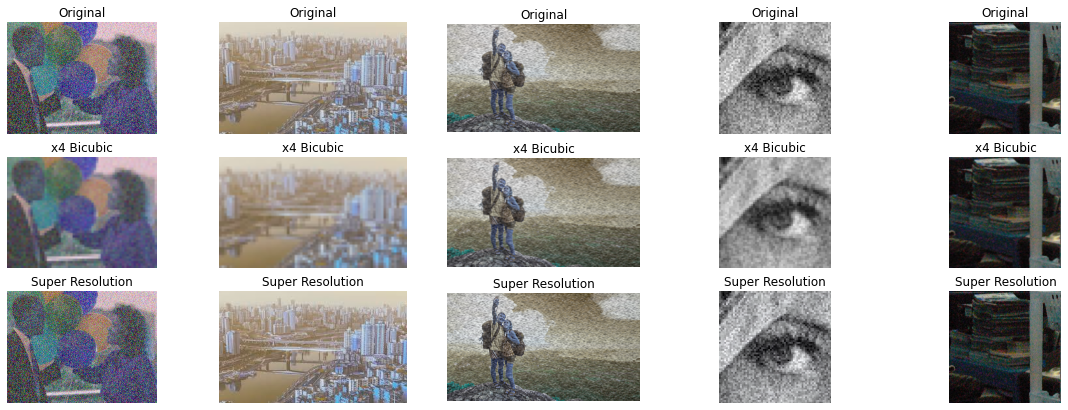

In [ ]:
n = 5 
plt.figure(figsize=(20, 7))
plt.gray()
for i in range(n): 
  # display original + noise 
  ax = plt.subplot(3, n, i + 1)
  hr_image = preprocess_image(image_set[i]) 
  plot_image(tf.squeeze(hr_image), title="Original") 
  ax.get_xaxis().set_visible(False) 
  ax.get_yaxis().set_visible(False) 
  
  # display reconstruction 
  bx = plt.subplot(3, n, i + n + 1) 
  lr_image = downscale_image(tf.squeeze(hr_image)) 
  plot_image(tf.squeeze(lr_image), "x4 Bicubic")
  bx.get_xaxis().set_visible(False) 
  bx.get_yaxis().set_visible(False) 

  cx = plt.subplot(3, n, i + 2*n + 1)
  fake_image = super_resolution(hr_image) 
  plot_image(tf.squeeze(fake_image), "Super Resolution")
  cx.get_xaxis().set_visible(False) 
  cx.get_yaxis().set_visible(False) 
  
plt.show()